# Model Comparison

This notebook compares the baseline CNN, LSTM, and DNN models for crop yield prediction.
We evaluate the models using Mean Squared Error (MSE) and Mean Absolute Error (MAE) on the test set.


## Import Libraries and Load Models 

In [2]:
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load processed data
X_test = np.load("../processed/X_final.npy")[-int(0.2*56717):]  # last 20% as test
y_test = np.load("../processed/y_log.npy")[-int(0.2*56717):]    # log-transformed target

# Reshape for CNN/LSTM
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_test_lstm = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Load trained models
cnn_model = load_model("../processed/cnn_baseline_model.keras")
lstm_model = load_model("../processed/lstm_baseline_model.keras")
dnn_model = load_model("../processed/dnn_baseline_model.keras")


## Evaluate all models CNN, LSTM, DNN 

In [3]:
# CNN
cnn_mse, cnn_mae = cnn_model.evaluate(X_test_cnn, y_test, verbose=0)
# LSTM
lstm_mse, lstm_mae = lstm_model.evaluate(X_test_lstm, y_test, verbose=0)
# DNN
dnn_mse, dnn_mae = dnn_model.evaluate(X_test, y_test, verbose=0)

print(f"CNN - Test MSE: {cnn_mse:.4f}, Test MAE: {cnn_mae:.4f}")
print(f"LSTM - Test MSE: {lstm_mse:.4f}, Test MAE: {lstm_mae:.4f}")
print(f"DNN - Test MSE: {dnn_mse:.4f}, Test MAE: {dnn_mae:.4f}")


CNN - Test MSE: 0.4079, Test MAE: 0.4820
LSTM - Test MSE: 0.5513, Test MAE: 0.5918
DNN - Test MSE: 0.0672, Test MAE: 0.1869


### Visual Comparison of Test MAE


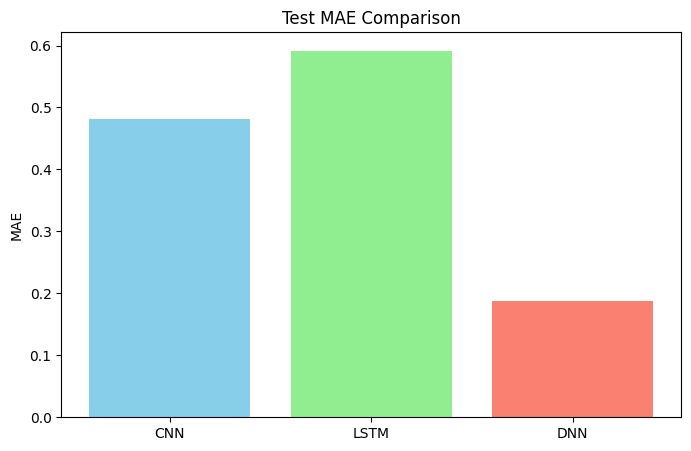

In [4]:
models = ['CNN', 'LSTM', 'DNN']
mae_values = [cnn_mae, lstm_mae, dnn_mae]

plt.figure(figsize=(8,5))
plt.bar(models, mae_values, color=['skyblue','lightgreen','salmon'])
plt.ylabel('MAE')
plt.title('Test MAE Comparison')
plt.show()


### Visual Comparison of Test MSE


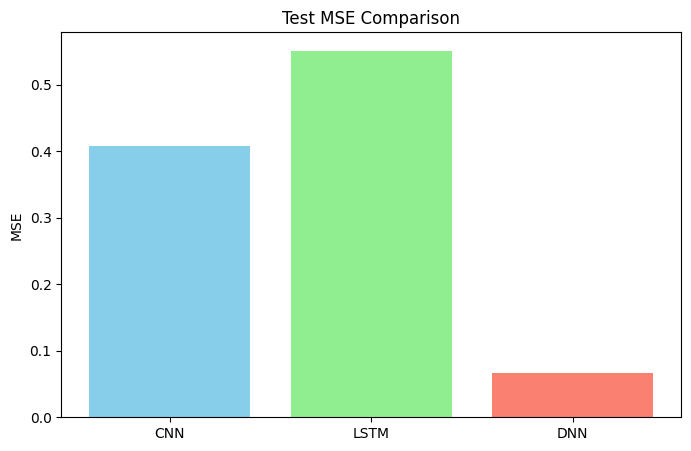

In [5]:
models = ['CNN', 'LSTM', 'DNN']
mse_values = [cnn_mse, lstm_mse, dnn_mse]

plt.figure(figsize=(8,5))
plt.bar(models, mse_values, color=['skyblue','lightgreen','salmon'])
plt.ylabel('MSE')
plt.title('Test MSE Comparison')
plt.show()


# Model Comparison

We compare the baseline CNN, LSTM, and DNN models for crop yield prediction using multiple metrics and visualizations.


In [6]:
# Evaluate all models
cnn_mse, cnn_mae = cnn_model.evaluate(X_test_cnn, y_test, verbose=0)
lstm_mse, lstm_mae = lstm_model.evaluate(X_test_lstm, y_test, verbose=0)
dnn_mse, dnn_mae = dnn_model.evaluate(X_test, y_test, verbose=0)

# Calculate RMSE
cnn_rmse = np.sqrt(cnn_mse)
lstm_rmse = np.sqrt(lstm_mse)
dnn_rmse = np.sqrt(dnn_mse)

# Summary table
import pandas as pd
comparison_df = pd.DataFrame({
    'Model': ['CNN', 'LSTM', 'DNN'],
    'Test MAE': [cnn_mae, lstm_mae, dnn_mae],
    'Test MSE': [cnn_mse, lstm_mse, dnn_mse],
    'Test RMSE': [cnn_rmse, lstm_rmse, dnn_rmse]
})
comparison_df


,Model,Test MAE,Test MSE,Test RMSE
0,CNN,0.482020,0.407919,0.638686
1,LSTM,0.591764,0.551259,0.742468
2,DNN,0.186946,0.067159,0.259151


### Visual Comparison of Test MAE and MSE


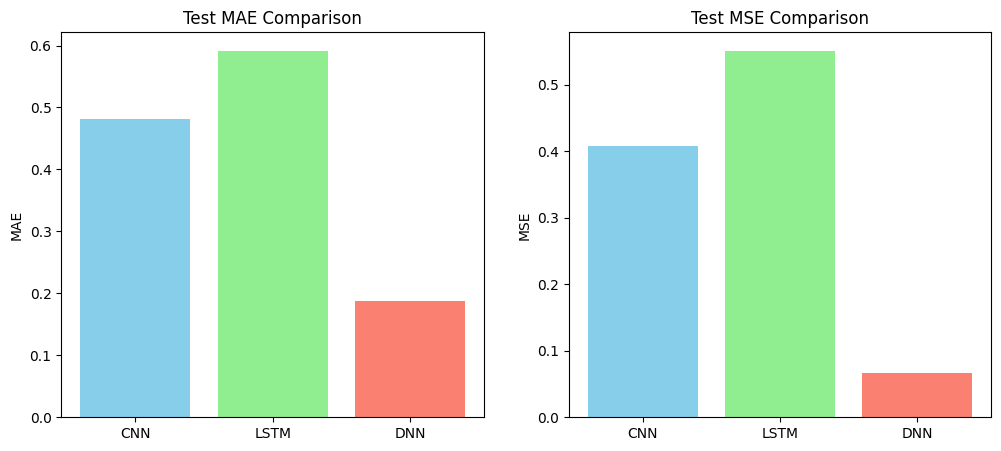

In [7]:
import matplotlib.pyplot as plt
import numpy as np

models = ['CNN', 'LSTM', 'DNN']
mae_values = [cnn_mae, lstm_mae, dnn_mae]
mse_values = [cnn_mse, lstm_mse, dnn_mse]

fig, ax = plt.subplots(1, 2, figsize=(12,5))

# MAE
ax[0].bar(models, mae_values, color=['skyblue','lightgreen','salmon'])
ax[0].set_title('Test MAE Comparison')
ax[0].set_ylabel('MAE')

# MSE
ax[1].bar(models, mse_values, color=['skyblue','lightgreen','salmon'])
ax[1].set_title('Test MSE Comparison')
ax[1].set_ylabel('MSE')

plt.show()
